In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from model import caption_decoder_fn
from pipeline import train_input_fn, predict_input_fn
from pipeline import coco
from pipeline.utils import Tokenizer

%matplotlib inline

In [2]:
coco.maybe_download_and_extract('./dataset/')

Data has apparently already been downloaded.
Data has apparently already been downloaded.
Data has apparently already been downloaded.


In [3]:
train_ids, train_filenames, train_captions = coco.load_records('./dataset/')
val_ids, val_filenames, val_captions = coco.load_records('./dataset/', train=False)

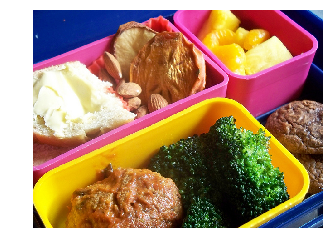

['Closeup of bins of food that include broccoli and bread.',
 'A meal is presented in brightly colored plastic trays.',
 'there are containers filled with different kinds of foods',
 'Colorful dishes holding meat, vegetables, fruit, and bread.',
 'A bunch of trays that have different food.']

In [4]:
img = np.array(Image.open(train_filenames[0]))

plt.imshow(img)
plt.axis('off')
plt.show()

train_captions[0]

In [5]:
tokenizer = Tokenizer()

tokenizer

<Tokenizer Vocab size: 10000, Start Token: "ssss ", End Token: " eeee">

In [6]:
train_seqs = tokenizer.fit_transform(train_captions)

print(train_seqs[0])

* Total Words Found: 44044
[[9998, 9097, 9995, 6006, 9995, 9928, 9977, 7629, 9676, 9991, 8523, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997], [9998, 9999, 9488, 9990, 5823, 9993, 8849, 9579, 9461, 5534, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997], [9998, 9944, 9982, 8745, 9876, 9992, 9838, 8933, 9995, 9050, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997, 9997], [9998, 9716, 9078, 9976, 8918, 8412, 7887, 9991,

In [7]:
val_seqs = tokenizer.transform(val_captions)

In [8]:
len(tokenizer.word_to_ids)

10000

In [9]:
train_fn = lambda: train_input_fn(train_filenames, train_seqs, [224, 224])
val_fn = lambda: train_input_fn(val_filenames, val_seqs, [224, 224], repeat=1)

In [10]:
estimator = tf.estimator.Estimator(model_fn=caption_decoder_fn,
                                   params={
                                       'embedding_size': 200,
                                       'vocab_size': 10001
                                   }, model_dir='./captioner')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa575b87b00>, '_master': '', '_num_worker_replicas': 1, '_model_dir': './captioner', '_service': None, '_save_summary_steps': 100, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_global_id_in_cluster': 0, '_train_distribute': None, '_log_step_count_steps': 100, '_task_id': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker'}


In [11]:
EPOCHS = 5
TRAIN_STEPS = int(EPOCHS * len(train_filenames)) // 32 # batch size

TRAIN_STEPS

18482

In [12]:
estimator.train(train_fn, steps=TRAIN_STEPS)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/beta
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/m

In [13]:
estimator.evaluate(val_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/beta:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/beta
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/gamma:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/gamma
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/moving_mean:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/moving_mean
INFO:tensorflow:Initialize variable module/MobilenetV1/Conv2d_0/BatchNorm/moving_variance:0 from checkpoint b'/tmp/tfhub_modules/c4c09833ad092847fbdb7e8607b042c3862a30a0/variables/variables' with MobilenetV1/Conv2d_0/BatchNorm/moving_variance
INFO:tensorflow:Initialize variable module/M

{'global_step': 14518, 'loss': 0.715341}

In [14]:
end_token_id = tokenizer.word_to_ids['eeee']
end_token_id

9997

In [15]:
start_token_id = tokenizer.word_to_ids['ssss']
start_token_id

9998

In [24]:
tf.logging.set_verbosity(tf.logging.ERROR)

def caption_generator(model, start_id, end_id, img_filename, max_len=50):
    caption_seqs = [start_id]
    while (caption_seqs[-1] != end_id) and (len(caption_seqs) <= max_len):
        input_fn = lambda: predict_input_fn([img_filename], [caption_seqs], [224, 224])
        preds = model.predict(input_fn)
        new_caption_seqs = [start_id]
        for pred in preds:
            new_caption_seqs.extend(np.argmax(pred['preds'], -1).tolist())
        caption_seqs = new_caption_seqs
        print(caption_seqs)
    return caption_seqs

In [26]:
def seq_to_caption(tokenizer, seq):
    caption = []
    for s in seq:
        if s in tokenizer.ids_to_word:
            caption.append(tokenizer.ids_to_word[s])
        else:
            caption.append('<UNK>')
    return ' '.join(caption)

In [34]:
def show_img(img_file):
    img = np.array(Image.open(img_file))

    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [41]:
filename = train_filenames[10]

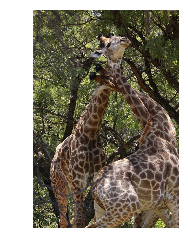

In [42]:
show_img(filename)

In [43]:
train_captions[10]

['A couple of giraffe snuggling each other in a forest.',
 'A couple of giraffe standing next to some trees.',
 'Two Zebras seem to be embracing in the wild. ',
 'Two giraffes hang out near trees and nuzzle up to each other.',
 'The two giraffes appear to be hugging each other.']

In [44]:
seq = caption_generator(estimator, start_token_id, end_token_id, filename)

[9998, 9999]
[9998, 9999, 9892]
[9998, 9999, 9892, 9983]
[9998, 9999, 9892, 9983, 9980]
[9998, 9999, 9892, 9983, 9980, 9988]
[9998, 9999, 9892, 9983, 9980, 9988, 9999]
[9998, 9999, 9892, 9983, 9980, 9988, 9999, 9817]
[9998, 9999, 9892, 9983, 9980, 9988, 9999, 9817, 9993]
[9998, 9999, 9892, 9983, 9980, 9988, 9999, 9817, 9993, 9999]
[9998, 9999, 9892, 9983, 9980, 9988, 9999, 9817, 9993, 9999, 9925]
[9998, 9999, 9892, 9983, 9980, 9988, 9999, 9817, 9993, 9999, 9925, 9997]


In [45]:
seq_to_caption(tokenizer, seq)

'ssss a giraffe standing next to a tree in a field. eeee'